Random Forest

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"

btc_price_history = pd.read_json(DATASET_PATH)

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

interval = "12h"

close_timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
close_prices = btc_price_history[interval]["c"]

X = close_timestamps.values.astype(int).reshape(-1, 1)
y = close_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

random_forest = RandomForestRegressor(n_estimators=100, max_depth=2, min_samples_leaf=5, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error: 256063096.7869873
Root Mean Squared Error (RMSE): 16001.971653111603
R-squared (R²): -0.004895152002194703


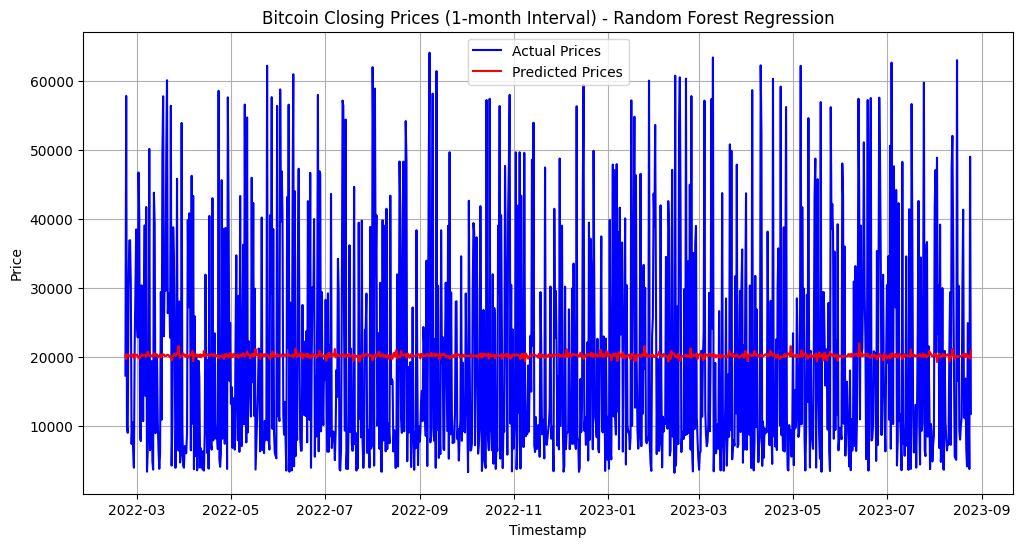

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(close_timestamps[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(close_timestamps[-len(y_test):], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Bitcoin Closing Prices (1-month Interval) - Random Forest Regression")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import datetime

oct_10_2023 = datetime.datetime(2023, 10, 10)

epoch = oct_10_2023.timestamp() * 1000

In [5]:
random_forest.predict([[epoch]])

array([20307.73043554])